In [26]:
import tensorflow as tf
print(tf.test.gpu_device_name())
print(tf.config.list_physical_devices())

/device:GPU:0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
#loss curve
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
from keras.api._v2.keras import activations
# A function that creates a dedicated model
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = "relu"))

    # if you add a keras layer, then add one layer behind a hidden layer
    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation = "softmax"))
    return model

In [10]:
model = model_fn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Store the result of fit() execution
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.8911
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2942 - accuracy: 0.8960
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8985
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2777 - accuracy: 0.9004
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2723 - accuracy: 0.9048


In [15]:
# What's inside the history object?
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [17]:
print(history.history["loss"])
print(history.history["accuracy"])

[0.30385658144950867, 0.29417622089385986, 0.2864658534526825, 0.2776908278465271, 0.2722531259059906]
[0.8911250233650208, 0.8959791660308838, 0.8985000252723694, 0.9004374742507935, 0.9048125147819519]


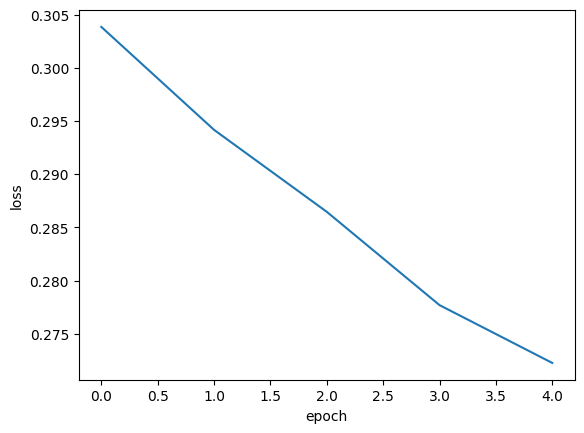

In [18]:
# Draw a graph based on the history object!
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

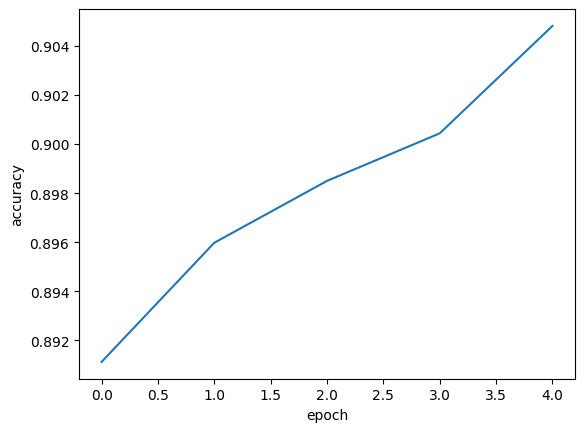

In [19]:
# How about accuracy?
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5295 - accuracy: 0.8135
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3950 - accuracy: 0.8592
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3541 - accuracy: 0.8710
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3303 - accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.8870
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3022 - accuracy: 0.8924
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2941 - accuracy: 0.8949
Epoch 8/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2852 - accuracy: 0.8991
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2771 - accuracy: 0.9009
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.270

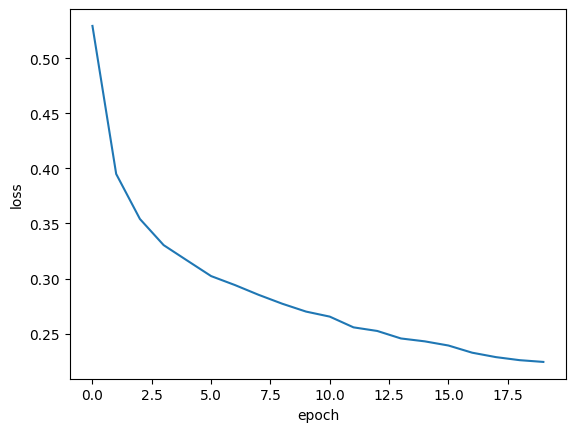

In [27]:
# What if we run 20 epochs?
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20)

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [36]:
# Loss validation
# Judge underfitting or overfitting by loss values
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))        # run validation process every epoch

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5341 - accuracy: 0.8125 - val_loss: 0.4091 - val_accuracy: 0.8548
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3901 - accuracy: 0.8588 - val_loss: 0.3724 - val_accuracy: 0.8713
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3518 - accuracy: 0.8726 - val_loss: 0.3609 - val_accuracy: 0.8761
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3288 - accuracy: 0.8824 - val_loss: 0.3362 - val_accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3121 - accuracy: 0.8879 - val_loss: 0.3893 - val_accuracy: 0.8683
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3026 - accuracy: 0.8911 - val_loss: 0.3515 - val_accuracy: 0.8782
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2909 - accuracy: 0.8970 - val_loss: 0.3726 - val_accuracy:

In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


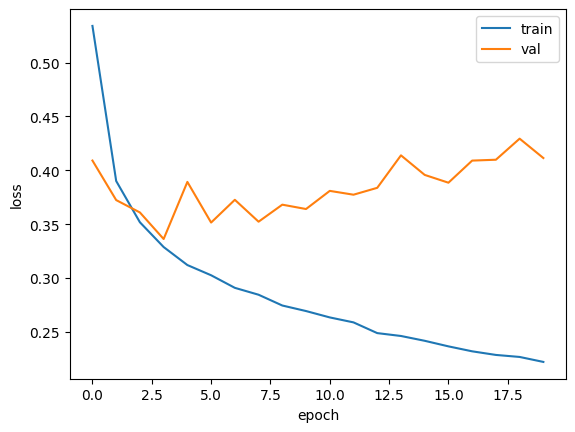

In [38]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5305 - accuracy: 0.8167 - val_loss: 0.4218 - val_accuracy: 0.8519
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4015 - accuracy: 0.8566 - val_loss: 0.3813 - val_accuracy: 0.8633
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3595 - accuracy: 0.8692 - val_loss: 0.3573 - val_accuracy: 0.8718
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3312 - accuracy: 0.8791 - val_loss: 0.3874 - val_accuracy: 0.8637
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3128 - accuracy: 0.8841 - val_loss: 0.3573 - val_accuracy: 0.8703
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2954 - accuracy: 0.8903 - val_loss: 0.3353 - val_accuracy: 0.8776
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2840 - accuracy: 0.8957 - val_loss: 0.3578 - val_accuracy:

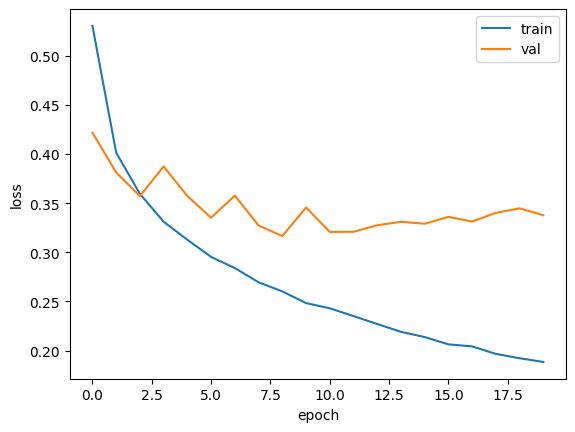

In [39]:
# Use Adam optimizer to suppress the overfitting problem
model = model_fn()
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target ,epochs = 20, validation_data = (val_scaled, val_target))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()

In [41]:
# Suppress overfitting by using dropout, which is one of the most famous method of regulatio in deep neural networking
model = model_fn(keras.layers.Dropout(0.3))     # 30% of the total neurons will be dropped out (=regulated)
model.summary()

# The dropped out layer doesn't have a model parameter to be learnt

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5913 - accuracy: 0.7921 - val_loss: 0.4246 - val_accuracy: 0.8479
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4418 - accuracy: 0.8395 - val_loss: 0.3907 - val_accuracy: 0.8550
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4033 - accuracy: 0.8541 - val_loss: 0.3766 - val_accuracy: 0.8624
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3870 - accuracy: 0.8589 - val_loss: 0.3651 - val_accuracy: 0.8652
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3666 - accuracy: 0.8641 - val_loss: 0.3421 - val_accuracy: 0.8758
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3579 - accuracy: 0.8687 - val_loss: 0.3418 - val_accuracy: 0.8752
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3439 - accuracy: 0.8736 - val_loss: 0.3356 - val_accuracy:

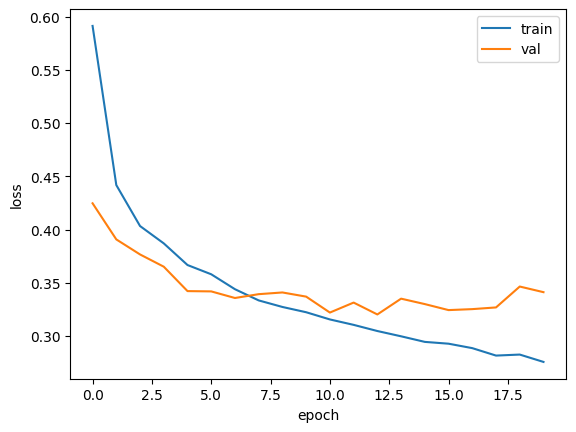

In [42]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()

In [49]:
# Create a model to save(export)

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 10, validation_data = (val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5907 - accuracy: 0.7920 - val_loss: 0.4144 - val_accuracy: 0.8487
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4399 - accuracy: 0.8403 - val_loss: 0.3865 - val_accuracy: 0.8561
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3997 - accuracy: 0.8547 - val_loss: 0.3676 - val_accuracy: 0.8676
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.8603 - val_loss: 0.3496 - val_accuracy: 0.8718
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3626 - accuracy: 0.8661 - val_loss: 0.3568 - val_accuracy: 0.8708
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8694 - val_loss: 0.3406 - val_accuracy: 0.8764
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3422 - accuracy: 0.8734 - val_loss: 0.3416 - val_accuracy:

In [51]:
# save the model paramter of the trained model
model.save_weights("model-weights.h5")

In [52]:
# save the model structure and the following model parameter at once
model.save("model-whole.h5")

In [53]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jun 22 13:16 model-weights.h5
-rw-r--r-- 1 root root 981176 Jun 22 13:17 model-whole.h5


In [54]:
# Create a raw model which hasn't been trained yet and import the model paramter from h5 format
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

In [55]:
# accuracy calculaltion
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = 1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8781666666666667


In [56]:
# Read the whole model and predict, calculate the accuracy
model = keras.models.load_model("model-whole.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3397 - accuracy: 0.8782


[0.33974388241767883, 0.878166675567627]

In [57]:
# Using callback, set the model to save the current models every epoch
# However, with adding more arguments, we'll only save the best performancing model.
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only = True)                 # <---- ***THIS***

model.fit(train_scaled, train_target, epochs = 20,
            validation_data = (val_scaled, val_target),
            callbacks = [checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5988 - accuracy: 0.7898 - val_loss: 0.4355 - val_accuracy: 0.8445
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4443 - accuracy: 0.8393 - val_loss: 0.3817 - val_accuracy: 0.8573
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4058 - accuracy: 0.8551 - val_loss: 0.3749 - val_accuracy: 0.8636
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3864 - accuracy: 0.8580 - val_loss: 0.3560 - val_accuracy: 0.8717
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3678 - accuracy: 0.8657 - val_loss: 0.3428 - val_accuracy: 0.8775
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3560 - accuracy: 0.8701 - val_loss: 0.3398 - val_accuracy: 0.8765
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3445 - accuracy: 0.8727 - val_loss: 0.3393 - val_accuracy:

In [58]:
!ls -al *.h5 | grep best

-rw-r--r-- 1 root root 981176 Jun 22 13:26 best-model.h5


In [60]:
# Use that the "best model"
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3163 - accuracy: 0.8870


[0.31634092330932617, 0.8870000243186951]

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")

checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5", save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)    # Terminate training if the model doesn't get better 2 times in a row
                                                                                                # and return to the best performancing epoch

history = model.fit(train_scaled, train_target, epochs = 20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5947 - accuracy: 0.7915 - val_loss: 0.4330 - val_accuracy: 0.8407
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4401 - accuracy: 0.8415 - val_loss: 0.3984 - val_accuracy: 0.8503
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4019 - accuracy: 0.8533 - val_loss: 0.3771 - val_accuracy: 0.8633
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3837 - accuracy: 0.8615 - val_loss: 0.3644 - val_accuracy: 0.8679
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3669 - accuracy: 0.8665 - val_loss: 0.3497 - val_accuracy: 0.8718
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3540 - accuracy: 0.8697 - val_loss: 0.3519 - val_accuracy: 0.8717
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3456 - accuracy: 0.8730 - val_loss: 0.3390 - val_accuracy:

In [67]:
# In which epoch did the training stopped due to the preconfigured callback settings?
print(early_stopping_cb.stopped_epoch)

12


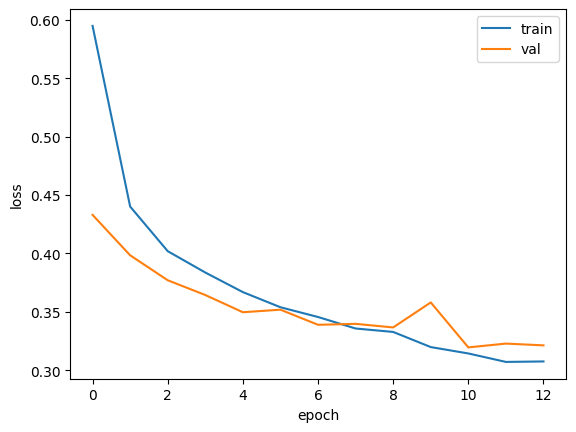

In [68]:
# Draw the training progress into a graph

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])

plt.show()

In [69]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8845


[0.31960946321487427, 0.8845000267028809]